# Inverse Reinforcement Learning

Table of contents
- Motivation
- Problem formulation
- Reward based
  - Greedy method
  - Maximum margin planning
- Feature based
- Maximum entropy approach
    - Representitive reward function
    - Unknown dynamics
  - Maximum causal entroy
    - linear dynamic system
    - Partial observable
- General framework

## Maximum entropy approach
**Motivation** - solve ambiguity of optimal policy by min-max log-loss
$$p(\tau|\theta) = \frac{1}{Z(\theta)}e^{\theta^T f(\tau)} = \frac{1}{Z(\theta)}e^{\sum_t \theta^T f(s_t)}$$
Note that $\theta^T f(s_t)$ is considered as a reward function.  
**Method**  
Maximize the log-likelihood of the observed data
$$\theta^* = \arg\max L(\theta) = \arg\max \sum_n p(\tau_n|\theta)$$
Gradient descent    
The gradient is the difference between expected
empirical feature counts and the learner’s expected feature
counts
$$\nabla_{\theta} L(\theta) = \frac{1}{N}\sum_n\sum_t f(s_{n,t})- \sum_s p(s|\theta)f(s)$$

**Algorithm**  
Repeat until stop condition meet
1. Solve for optimal policy $\pi(a|s)$ w.r.t. $\theta$ with value iteration
2. solve for state visitation frequencies $p(s|\theta)$
3. Compute gradient $\nabla_{\theta} L(\theta)$
4. Update $\theta$

**Benefit**   
- as uncertainty as possible
- stochastic policy
- deal with sub-optimal expert demo 

**Limits**
- requires small action and state space
- amounts to a dynamic programming algorithm (exact forward-backward inference)
- require knowing dynamics
- linear feature function

[paper link](./papers/maximum-entropy-IRL.pdf)  
**Note**
- not clear about the non-deterministic path distributions or stochastic policies
- not clear about the detail of the so-called expected edge frequency calculution

### Representative reward function
**Motivation** - expoit more representative reward function using neural network
Use the maximum entropy formulation
$$p(\tau|\theta) = \frac{1}{Z(\theta)}e^{\sum_{s,a\in\tau} r_{s,a}}$$
where $r_{s,a}$ is the reward function which is approximated by a neural network.
$$r \approx g(f,\theta_1,\ldots,\theta_n)=g_1(g_2(\ldots(g_n(f,\theta_n),\ldots),\theta_2),\theta_1).$$
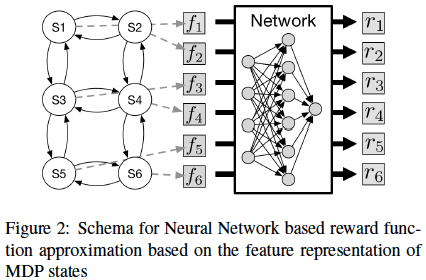
**Method**  
Maximize the log-likelihood of the observed data

**Algorithm**
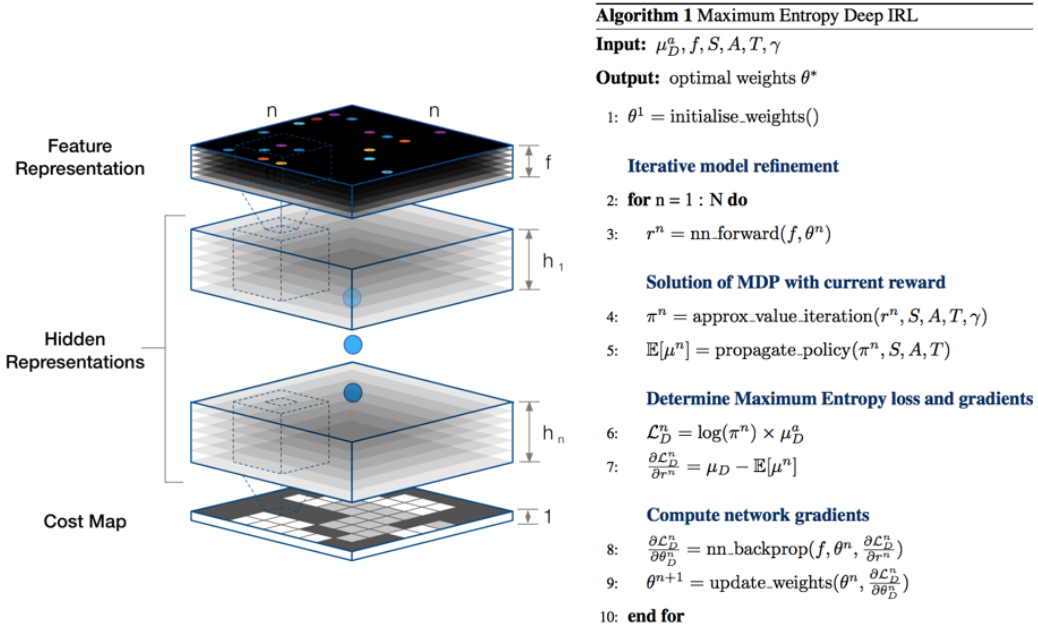
**Benefit**  
- scales the reward function to neural network  

**Limits**
- the formulation of the policy not strictly follows the motivaiton of matching performance
- require knowing dynamics
- need to repeatly solve the MDP (low efficiency)

[paper link](./papers/deep-IRL.pdf)

### Unknown dynamics 
**Motivation**
- the need for more representative cost (or reward) function
- the need for learning cost function without knowning dynamics for high-dimensional continuous systems.  
$$p(\tau|\theta) = \frac{1}{Z(\theta)}e^{-c_{\theta}(\tau)} = \frac{1}{Z(\theta)}e^{\sum_t -c_{\theta}(s_t, a_t)}$$
where $c_{\theta}(\tau)$ is an unknown cost function.

**Main points**
- reprents cost function using neural network
- adaptive importance sampling via policy optimization
$$L(\theta)=\frac{1}{N}\sum_{{\tau}_i\in\mathcal{D}_{\text{demo}}}c_{\theta}({\tau}_i)+\log Z
\approx \frac{1}{N}\sum_{{\tau}_i\in\mathcal{D}_{\text{demo}}}c_{\theta}({\tau}_i)+\log\frac{1}{M}\sum_{{\tau}_j\in\mathcal{D}_{\text{samp}}}\frac{e^{-c_{\theta}({\tau}_j)}}{q({\tau}_j)}$$
where $q$ denotes the background distribution from which trajectories $\tau_j$ were sampled.
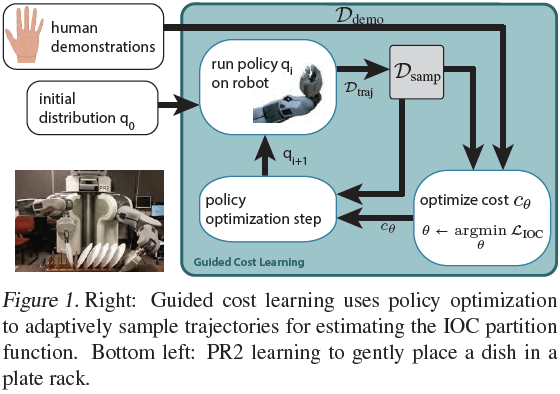

**Algorithm**  
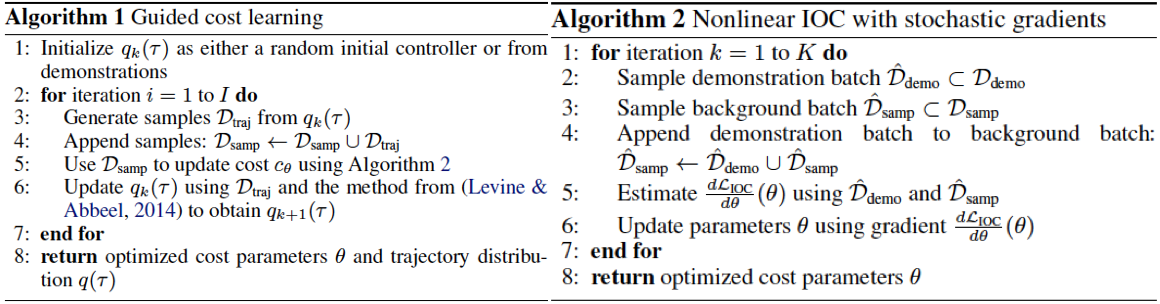

**Benefit**
- can handle unknown dynamics
- scales to neural net costs
- efficient enough for real robots  

**Limits**
- the formulation of the policy not strictly follows the motivaiton of matching performance
- adversarial optimization is hard
- can't scale to raw pixel observations of demos
- demo typically collected with kinesthetic teaching or teleoperation (first person) instead of human expert demo
- sampling requires working on the agent

[paper link](./papers/sample-deep-IRL.pdf)